# 0.0 Initial

## 0.1. Import

In [37]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib import pyplot          as plt

from IPython.display       import Image

## 0.2. Helper Functions

In [38]:
def bmi (height, weight):
    bmi = weight/((height/100)**2)
    return bmi

## 0.3. Loading Data

In [39]:
df_raw = pd.read_csv('cardio_train.csv', low_memory=False)

In [56]:
df_raw

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# 1.0. Data Description

In [55]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [42]:
print('Number of columns:', format(df1.shape[1]))
print('Number of rows:', format(df1.shape[0]))

Number of columns: 13
Number of rows: 70000


## 1.2. Data Types

In [43]:
df1.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## 1.3. Check NA

In [44]:
df1.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 1.4. Unit change

In [57]:
df1['age'] = df1['age']/365
#plt.subplot(1,3,1)
#sns.boxplot(x='age', data=df1)

## 1.5. Descriptive Statiscal

In [58]:
#central tendency - mean, median
ct1 = pd.DataFrame(df1.apply(np.mean)).T
ct2 = pd.DataFrame(df1.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(df1.apply(min)).T
d2 = pd.DataFrame(df1.apply(max)).T
d3 = pd.DataFrame(df1.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(df1.apply(np.std)).T
d5 = pd.DataFrame(df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df1.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d1,d2,d3,ct1,ct2,d4,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.000000,99999.000000,99999.000000,49972.419900,50001.500000,28851.096242,-0.001278,-1.198374
1,age,29.583562,64.967123,35.383562,53.339358,53.980822,6.759545,-0.307055,-0.823447
2,gender,1.000000,2.000000,1.000000,1.349571,1.000000,0.476835,0.630960,-1.601935
3,height,55.000000,250.000000,195.000000,164.359229,165.000000,8.210068,-0.642187,7.943653
4,weight,10.000000,200.000000,190.000000,74.205690,72.000000,14.395654,1.012070,2.586825
5,ap_hi,-150.000000,16020.000000,16170.000000,128.817286,120.000000,154.010319,85.296214,7580.074738
6,ap_lo,-70.000000,11000.000000,11070.000000,96.630414,80.000000,188.471184,32.114083,1425.914585
7,cholesterol,1.000000,3.000000,2.000000,1.366871,1.000000,0.680245,1.587123,0.993901
8,gluc,1.000000,3.000000,2.000000,1.226457,1.000000,0.572266,2.397462,4.294377
9,smoke,0.000000,1.000000,1.000000,0.088129,0.000000,0.283482,2.905867,6.444250


# 2.0. Feature Engineering

In [47]:
df2 = df1.copy()

**Identification**

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code | 1 - women | 2 - men



**Review of Systems**

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

**Habits**

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

**Target Variable**

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

## 2.1 Mind Map Hypothesis

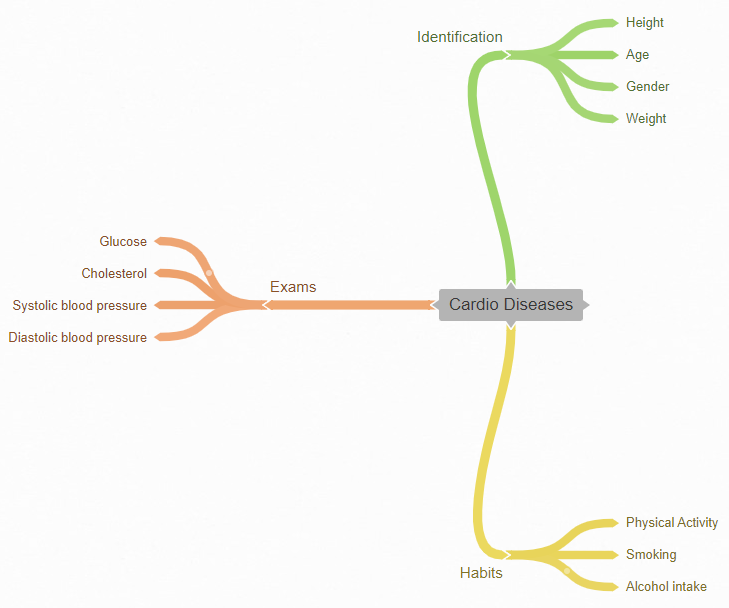

In [48]:
Image('CCD.png')

## 2.2 Hypothesis Creation

### 2.1.1 Identification Hypothesis

**1.** People over 50 are 20% more likely to have CVDs

**2.** People shorter than 170 cm (5'7'') have a 5% chance of CVDs

**3.** Men are 30% more likely than women to develop a CVD

**4.** People over 100 kg (220 lb) have a 40% chance of having a CVD

**5.** People with a BMI above 30 (obese class I) have a 25% chance of having a CVD

### 2.1.2 Habits Hypothesis

**1.** People who do not engage in physical activity are 40% more likely to have CDCs

**2.** People who regularly consume alcohol have a 10% chance of having CVD

**3.** People who smoke are 20% more likely to have CVD

### 2.1.3 Exams Hypothesis

**1.** People who have well above normal cholesterol have a 50% chance of having CVD

**2.** People who have well above normal glucose have a 20% chance of having CVD

**3.** People who have high diastolic blood pressure have a 40% chance of having CVD

**4.** People who have high systolic blood pressure have a 40% chance of having CVD

## 2.3. Final Hypothesis

**1.** People over 50 are 20% more likely to have CVDs

**2.** People shorter than 170 cm (5'7'') have a 5% chance of CVDs

**3.** Men are 30% more likely than women to develop a CVD

**4.** People over 100 kg (220 lb) have a 40% chance of having a CVD

**5.** People with a BMI above 30 (obese class I) have a 25% chance of having a CVD

**6.** People who do not engage in physical activity are 40% more likely to have CVDs

**7.** People who regularly consume alcohol have a 10% chance of having CVD

**8.** People who smoke are 20% more likely to have CVD

**9.** People who have well above normal cholesterol have a 50% chance of having CVD

**10.** People who have well above normal glucose have a 20% chance of having CVD

**11.** People who have high diastolic blood pressure have a 40% chance of having CVD

**12.** People who have high systolic blood pressure have a 40% chance of having CVD

## 2.4. Feature Engineering

In [59]:
#BMI
df2['bmi'] = bmi(df2['height'], df2['weight'])

In [60]:
df2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


# 3.0. Exploratory Data Analysis

In [69]:
df3 = df2.copy()

## 3.1 Univariate Analysis

### 3.1.1 Response variable

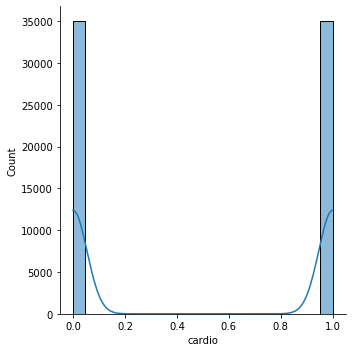

In [52]:
sns.displot(df3['cardio'], kde=True)

### 3.1.2 Numeric variable

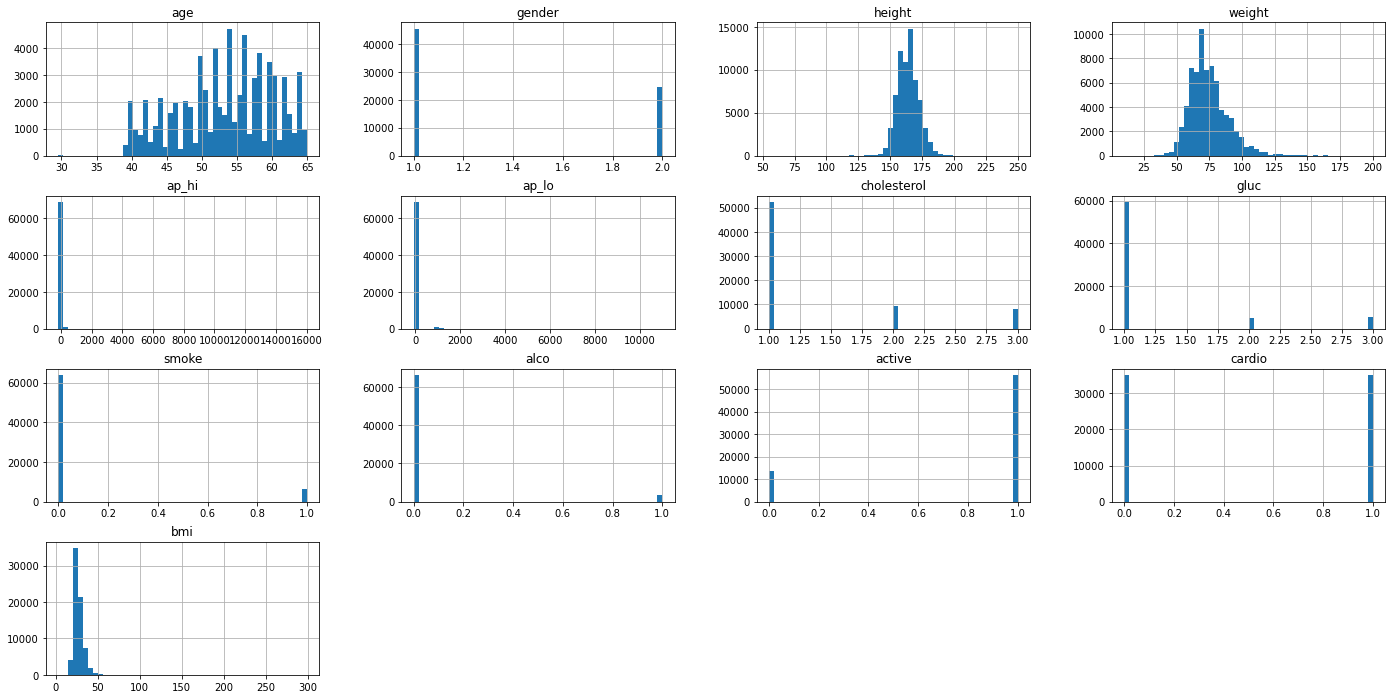

In [70]:
df32 = df3.drop('id', axis=1)
df32.hist(figsize=(24,12), bins=50);

## 3.2. Bivariate Analysis

**1. People over 50 are 20% more likely to have CVDs**